# Exploration–Exploitation in a Multi-Armed Bandit

## 1. Introduction
Reinforcement Learning (RL) agents must balance **exploration** (trying actions to gather information) and **exploitation** (choosing actions believed to be best). The multi-armed bandit problem is a canonical setting to study this trade-off. In this notebook, we implement an **ε-greedy agent** on a stationary 10-armed bandit and analyze its behavior through quantitative results and visualizations.

## 2. Problem Setup
We consider a multi-armed bandit with $K = 10$ independent arms. Each arm $a \in \{0, \dots, 9\}$ has an unknown true value $q_*(a)$, which is the mean of a Gaussian reward distribution:

$
R_t \mid A_t = a \sim \mathcal{N}(q_*(a), 1^2).
$

The agent interacts with the bandit for $T = 1000$ time steps and seeks to maximize the cumulative reward.



In [7]:
# 1.3 Example for Exploration and Exploitation- HoaDNt@fe.edu.vn
import numpy as np
import matplotlib.pyplot as plt

class EpsilonGreedyAgent:
    def __init__(self, num_actions, epsilon=0.1):
        self.num_actions = num_actions
        self.epsilon = epsilon
        self.action_values = np.zeros(num_actions)
        self.action_counts = np.zeros(num_actions)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            # Randomly choose an action for exploration
            action = np.random.randint(self.num_actions)
        else:
            # Choose the greedy action for exploitation
            action = np.argmax(self.action_values)
        return action

    def update_value(self, action, reward):
        self.action_counts[action] += 1
        # Update action-value estimate using incremental update rule
        self.action_values[action] += (1 / self.action_counts[action]) * (reward - self.action_values[action])

# Create a simple multi-armed bandit environment
class MultiArmedBandit:
    def __init__(self, num_arms):
        self.num_arms = num_arms
        self.true_action_values = np.random.normal(0, 1, num_arms)

    def get_reward(self, action):
        # Reward is sampled from a normal distribution with mean true action value and unit variance
        return np.random.normal(self.true_action_values[action], 1)

# Initialize the environment and agent
num_arms = 10
num_steps = 1000
agent = EpsilonGreedyAgent(num_arms)

# Interaction loop
bandit = MultiArmedBandit(num_arms)
total_rewards = 0
rewards_history = []
average_rewards = []

for step in range(num_steps):
    action = agent.select_action()
    reward = bandit.get_reward(action)
    agent.update_value(action, reward)

    total_rewards += reward
    rewards_history.append(reward)
    average_rewards.append(total_rewards / (step + 1))

print("Total rewards obtained:", total_rewards)
print("Estimated action values:", agent.action_values)

Total rewards obtained: 1788.9806370710999
Estimated action values: [-0.03973129  1.94245662  1.93215794  1.0764282  -0.60916746  1.12118123
  1.55602528  0.15233353 -1.64277433 -0.08732463]


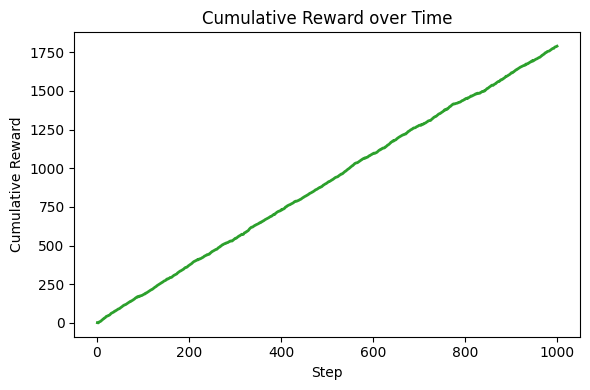

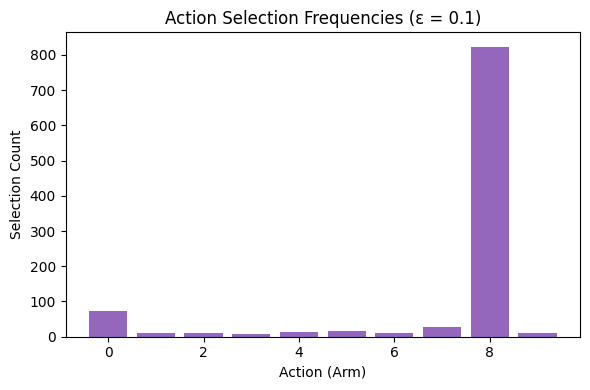

In [8]:
# Additional analysis: action selection statistics and cumulative reward

import numpy as np
import matplotlib.pyplot as plt

# 1) Cumulative reward over time
steps = np.arange(1, len(rewards_history) + 1)

cumulative_rewards = np.cumsum(rewards_history)

plt.figure(figsize=(6, 4))
plt.plot(steps, cumulative_rewards, color="tab:green", linewidth=2)
plt.xlabel("Step")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward over Time")
plt.tight_layout()
plt.show()

# 2) Action selection frequencies
# We recompute the trajectory to record which actions were chosen at each step.
actions_taken = []

# Re-run a single trajectory with the same configuration to log actions
bandit_analysis = MultiArmedBandit(num_arms)
agent_analysis = EpsilonGreedyAgent(num_arms, epsilon=agent.epsilon)

for step in range(num_steps):
    a = agent_analysis.select_action()
    r = bandit_analysis.get_reward(a)
    agent_analysis.update_value(a, r)
    actions_taken.append(a)

unique_actions, counts = np.unique(actions_taken, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(unique_actions, counts, color="tab:purple")
plt.xlabel("Action (Arm)")
plt.ylabel("Selection Count")
plt.title(f"Action Selection Frequencies (ε = {agent.epsilon})")
plt.tight_layout()
plt.show()


## 3. Method: ε-Greedy Action Selection

We use an **ε-greedy** policy with parameter $\varepsilon = 0.1$:

- With probability $\varepsilon$, the agent **explores** by selecting a random action uniformly among all arms.
- With probability $1 - \varepsilon$, the agent **exploits** by choosing the action with the highest current value estimate.

The action-value estimate for each arm $a$ is updated incrementally after observing reward $R_t$:

$
Q_{t+1}(a) = Q_t(a) + \frac{1}{N_t(a)} \bigl(R_t - Q_t(a)\bigr),
$

where $N_t(a)$ is the number of times action $a$ has been selected up to time $t$. This update rule is a sample-average estimator of $q_*(a)$.

## 4. Experimental Results and Visualizations
The following plots summarize the learning dynamics of the ε-greedy agent.

- **Instantaneous Reward per Step:** shows the stochastic reward signal at each time step.
- **Average Reward over Time:** smooths the noise and indicates whether the policy is improving.
- **True vs. Estimated Action Values:** compares the learned $Q(a)$ against the underlying $q_*(a)$.
- **Cumulative Reward:** reflects overall performance, i.e., how much return the agent has accumulated.
- **Action Selection Frequencies:** shows which arms the agent prefers in the long run, revealing the balance between exploration and exploitation.


## 5. Discussion

From the **average reward** and **cumulative reward** curves, we typically observe that the ε-greedy agent improves its performance over time as it discovers higher-value arms. The **true vs. estimated values** plot shows that, after enough interaction, the learned estimates $Q(a)$ are close to the underlying true values $q_*(a)$, with some residual error due to stochastic rewards and finite data.

The **action selection frequencies** indicate that the agent tends to select a small subset of high-value arms much more often, while still occasionally sampling other arms because of exploration. This behavior illustrates the core exploration–exploitation trade-off: a non-zero $\varepsilon$ allows the agent to avoid getting stuck with suboptimal actions early on.

## 6. Conclusion

In this small experiment, we demonstrated how an ε-greedy agent can learn near-optimal behavior in a stationary multi-armed bandit. The combination of reward-based plots and value/action statistics provides a clear picture of how the agent balances exploration and exploitation and how its estimates converge over time.


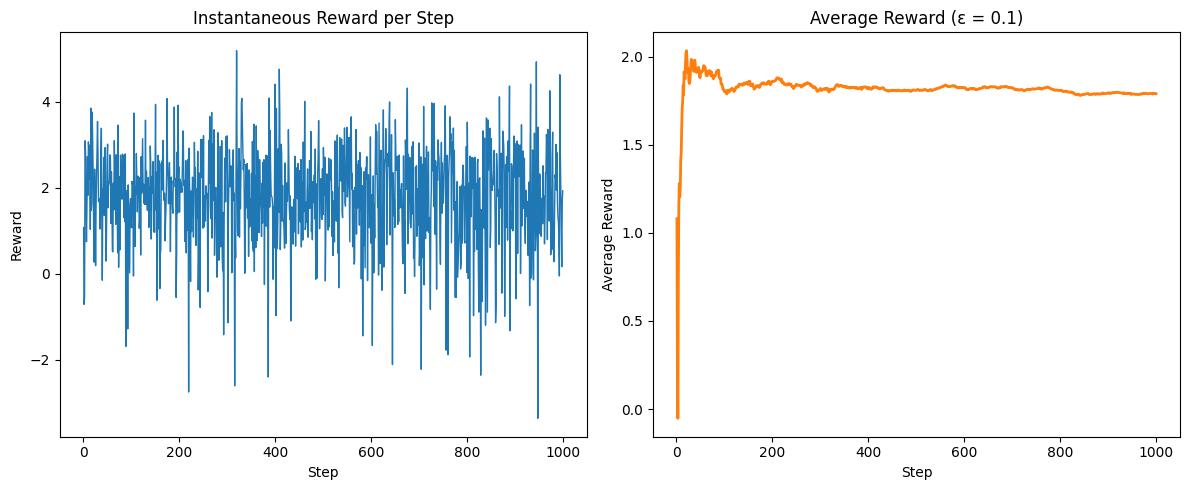

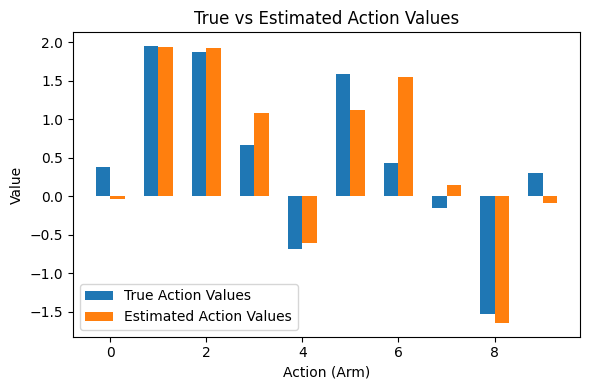

In [9]:
# Visualization of rewards over time
# Make sure you have executed the previous cell first so that
# `rewards_history` and `average_rewards` are defined.

import matplotlib.pyplot as plt
import numpy as np

steps = np.arange(1, len(rewards_history) + 1)

plt.figure(figsize=(12, 5))

# Instantaneous reward
plt.subplot(1, 2, 1)
plt.plot(steps, rewards_history, color="tab:blue", linewidth=1)
plt.xlabel("Step")
plt.ylabel("Reward")
plt.title("Instantaneous Reward per Step")

# Average reward
plt.subplot(1, 2, 2)
plt.plot(steps, average_rewards, color="tab:orange", linewidth=2)
plt.xlabel("Step")
plt.ylabel("Average Reward")
plt.title(f"Average Reward (ε = {agent.epsilon})")

plt.tight_layout()
plt.show()

# Optionally, visualize the learned value estimates vs. true values
plt.figure(figsize=(6, 4))
plt.bar(np.arange(num_arms) - 0.15, bandit.true_action_values, width=0.3, label="True Action Values")
plt.bar(np.arange(num_arms) + 0.15, agent.action_values, width=0.3, label="Estimated Action Values")
plt.xlabel("Action (Arm)")
plt.ylabel("Value")
plt.title("True vs Estimated Action Values")
plt.legend()
plt.tight_layout()
plt.show()
